In [1]:
import os
import pandas as pd
from pydataset import data
import env
import seaborn as sns
import scipy

# import our own acquire module
import acquire

import numpy as np
import matplotlib.pyplot as plt


# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from prepare import my_train_test_split

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

**Nº1 Section 1 : iris_db : Using iris data from our mySQL server and the methods used in the lesson above :**

        a / Acquire, prepare & split your data.

        b / Univariate Stats :
            - For each measurement type (quantitative variable) : create a histogram and boxplot, and compute
            descriptive statistics (using `.describe()`).

            - For each species (categorical variable) : create a frequency table and a bar plot of those 
            frequencies.
    
            - Document takeaways & any actions.


In [98]:
iris_db = acquire.get_iris_data(env.sql_connexion)

iris_db.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species_name  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris_db.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species_name    0
dtype: int64

In [99]:
iris_db = iris_db.rename(columns = {"species_name": "species"})
iris_db.head()

## renaming 'species_name' column to 'species'

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
## transforming 'species' via one-hot encoding

dummy_iris = pd.get_dummies(iris_db[['species']])

In [7]:
## putting numeric dyptes into variables 

num_vars = iris_db.select_dtypes(include = ['int64', 'float64'])

In [8]:
## putting categorical dyptes into variables 

cat_vars = iris_db.select_dtypes(include = ['object'])

In [9]:
concat_dummy_iris = iris_db = pd.concat([iris_db, dummy_iris], axis = 1)

concat_dummy_iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
145,6.7,3.0,5.2,2.3,virginica,0,0,1
146,6.3,2.5,5.0,1.9,virginica,0,0,1
147,6.5,3.0,5.2,2.0,virginica,0,0,1
148,6.2,3.4,5.4,2.3,virginica,0,0,1
149,5.9,3.0,5.1,1.8,virginica,0,0,1


In [100]:
def my_train_test_split(df, target):
    
    train, test = train_test_split(df, 
                                   test_size = .2, 
                                   random_state = 123, 
                                   stratify = df[target])
    
    train, validate = train_test_split(train, 
                                       test_size = .25, 
                                       random_state = 123, 
                                       stratify = train[target])
    
    return train, validate, test

# stratifying because we have a categorical target variable
# or, train_size = 0.8, train_size = 0.75 (or 0.7, etc)


In [101]:
itrain, ivalidate, itest = my_train_test_split(iris_db, target = 'species')

itrain.shape, ivalidate.shape, itest.shape

((90, 5), (30, 5), (30, 5))

**Section I.2 / Univariate Stats**

        - For each measurement type (quantitative variable): create a histogram and boxplot, and compute 
        descriptive statistics (using .describe()).

        - For each species (categorical variable): create a frequency table and a bar plot of those 
        frequencies.

        - Document takeaways & any actions.

In [12]:
print(num_vars.describe())
# quantitative / continuous variables

print('.-..-.-.-.--..-.-.-.--..-')
print('.-..-.-.-.--..-.-.-.--..-')

print(cat_vars.describe())
# categorical variables

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
.-..-.-.-.--..-.-.-.--..-
.-..-.-.-.--..-.-.-.--..-
       species
count      150
unique       3
top     setosa
freq        50


In [65]:
## IN-CLASS ALTERNATE

## ID the columns that are numeric,
## then filter the df by those column names :

# train[col].dtype != 'object'

[itrain['species'].dtype != 'object' for col in itrain.columns]

# this is the mask

[False, False, False, False, False, False, False, False]

In [102]:
num_cols = itrain.columns[[itrain[col].dtype != 'object' for col in itrain.columns]]
num_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

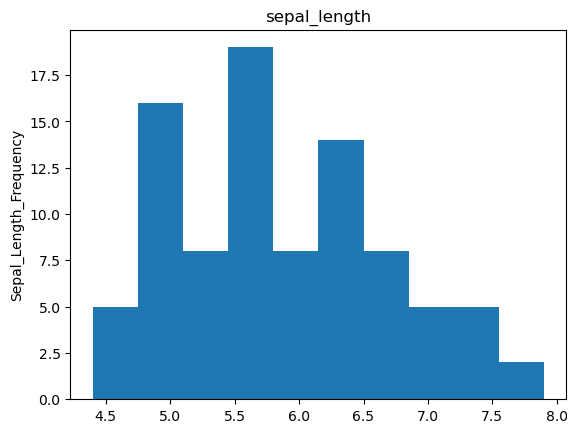

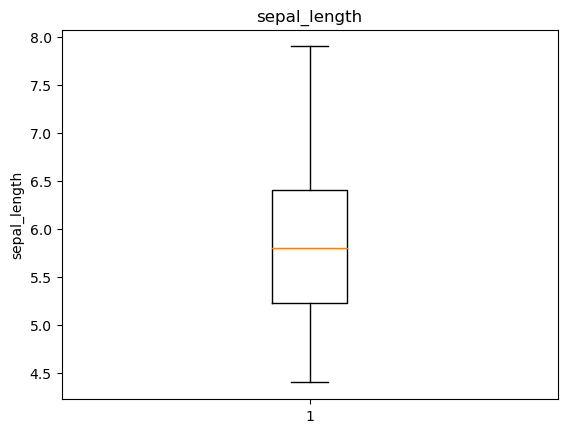

count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

In [103]:
## IN-CLASS ALTERNATE

## ## LOOP THROUGH EACH NUMERIC COLUMN AND PLOT A HISTOGRAM & BOXPLOT AND COMPUTE DESCRIPTIVE STATISTICS.

## MAKE IT WORK FOR 1 VARIABLE, FIRST, THEN MAKE IT WORK FOR ALL.

col = 'sepal_length'

plt.hist(itrain['sepal_length'])
plt.title(col)
plt.ylabel('Sepal_Length_Frequency')
plt.show()

plt.boxplot(itrain[col])
plt.title(col)
plt.ylabel(col)
plt.show()

## compute descriptive statistics

itrain[col].describe()

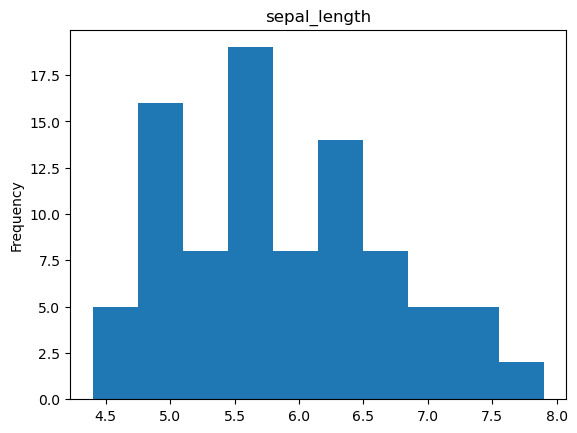

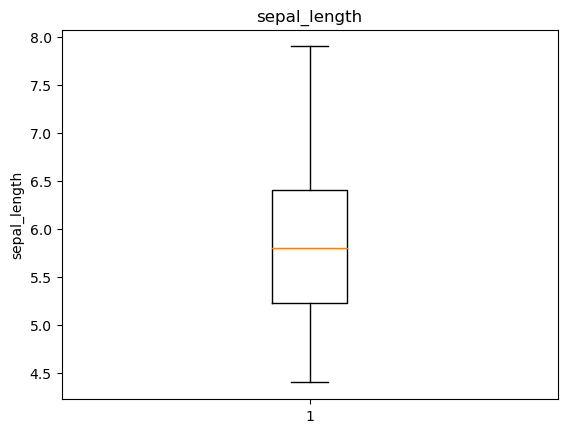

count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

In [104]:
col = 'sepal_length'

plt.hist(itrain[col])
plt.title(col)
plt.ylabel('Frequency')
plt.show()

plt.boxplot(itrain[col])
plt.title(col)
plt.ylabel(col)
plt.show()

## compute descriptive statistics

itrain[col].describe()



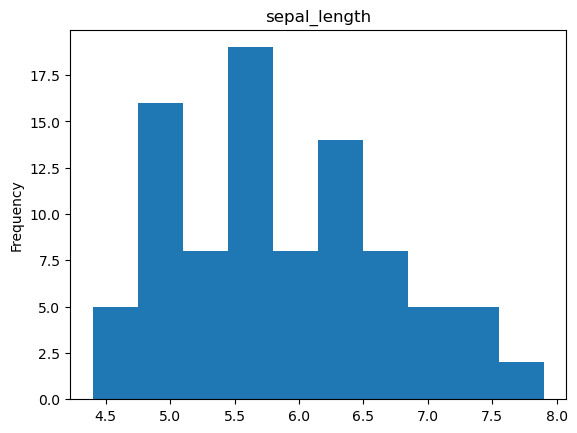

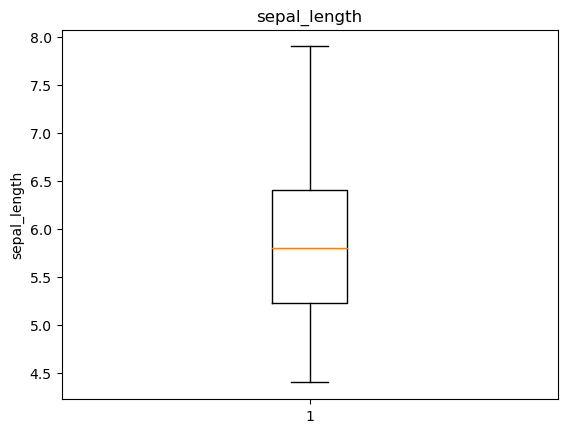

count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


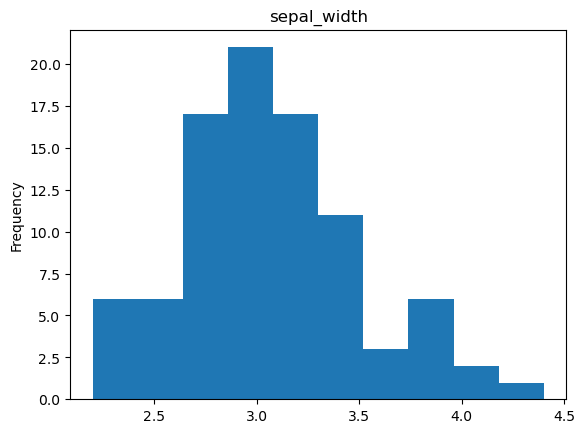

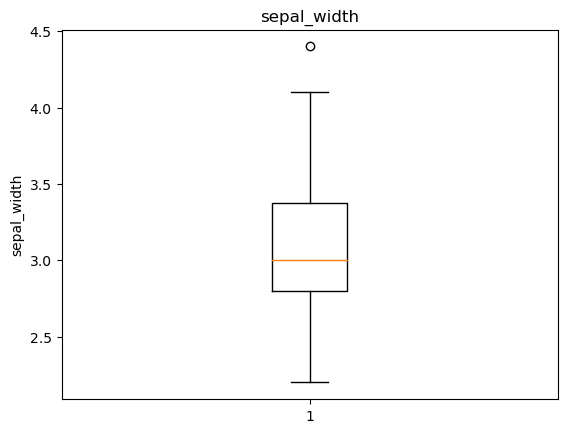

count    90.000000
mean      3.070000
std       0.436135
min       2.200000
25%       2.800000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64


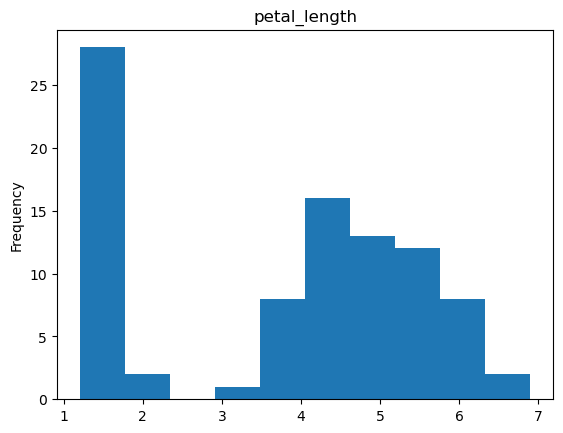

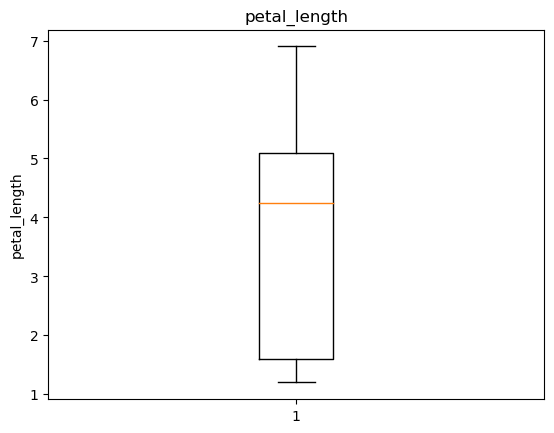

count    90.000000
mean      3.782222
std       1.742114
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


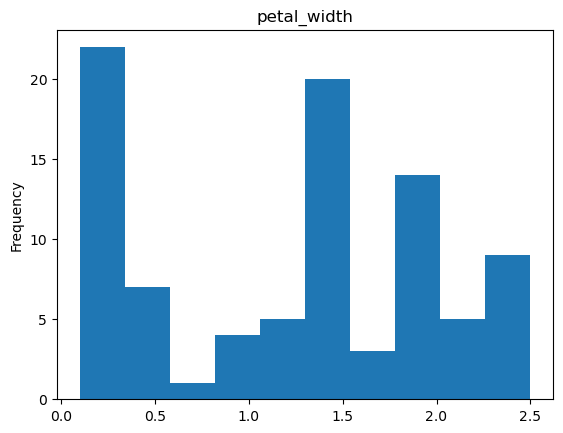

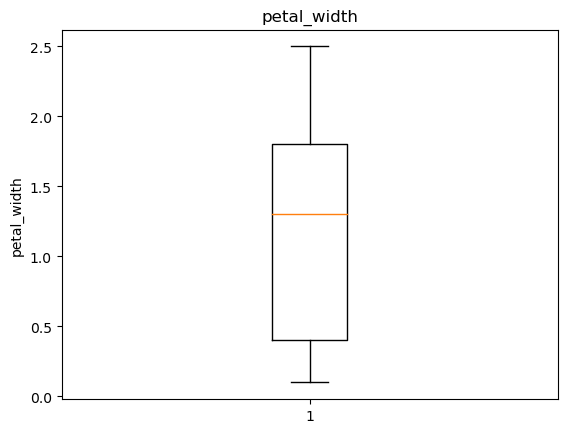

count    90.000000
mean      1.203333
std       0.755422
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [105]:
## IN-CLSAS ALERNATE METHOD

## CREATE A LOOP

for col in num_cols:
    plt.hist(itrain[col])
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.boxplot(itrain[col])
    plt.title(col)
    plt.ylabel(col)
    plt.show()
    
    ## compute descriptive statistics
    
    print(itrain[col].describe())

species
versicolor    30
virginica     30
setosa        30
Name: species, dtype: int64
versicolor    33.333333
virginica     33.333333
setosa        33.333333
Name: species, dtype: float64


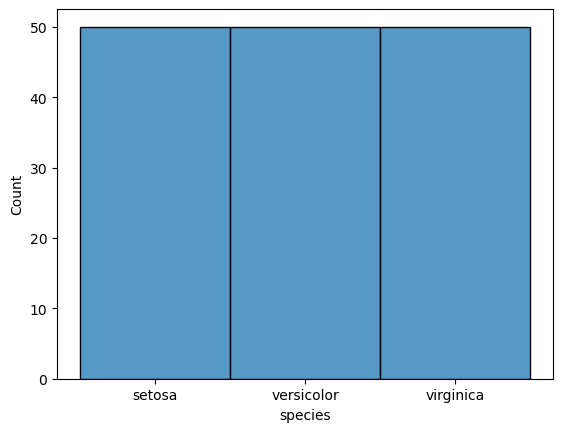

In [13]:
## THIS IS MINE

## make a loop with all the CATEGORICAL variables
## histogram

for column in cat_vars:
    print(column)
    print(itrain[column].value_counts())                           ## value count of each
    print(itrain[column].value_counts(normalize = True) * 100)     ## pc of each column
    sns.histplot(x = column, data = iris_db)
    plt.show()

sepal_length
5.0    7
6.4    7
5.7    6
5.8    6
5.4    5
6.3    5
5.5    4
6.9    4
5.9    3
4.8    3
4.9    3
5.1    3
7.2    3
6.0    3
6.7    3
5.6    3
6.5    3
6.2    2
6.1    2
5.2    2
4.6    2
7.7    1
6.6    1
7.9    1
6.8    1
5.3    1
4.4    1
7.3    1
7.4    1
7.0    1
4.5    1
4.7    1
Name: sepal_length, dtype: int64
5.0    7.777778
6.4    7.777778
5.7    6.666667
5.8    6.666667
5.4    5.555556
6.3    5.555556
5.5    4.444444
6.9    4.444444
5.9    3.333333
4.8    3.333333
4.9    3.333333
5.1    3.333333
7.2    3.333333
6.0    3.333333
6.7    3.333333
5.6    3.333333
6.5    3.333333
6.2    2.222222
6.1    2.222222
5.2    2.222222
4.6    2.222222
7.7    1.111111
6.6    1.111111
7.9    1.111111
6.8    1.111111
5.3    1.111111
4.4    1.111111
7.3    1.111111
7.4    1.111111
7.0    1.111111
4.5    1.111111
4.7    1.111111
Name: sepal_length, dtype: float64


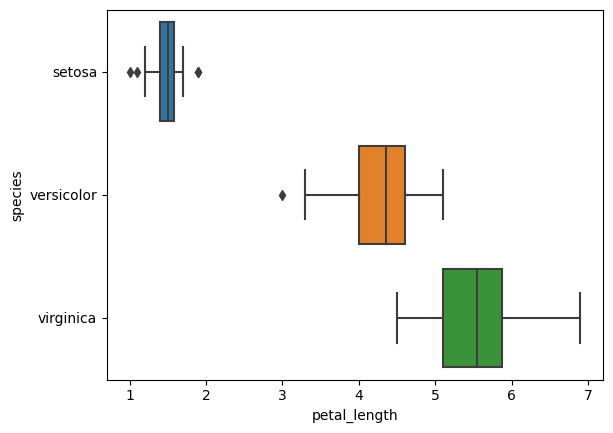

sepal_width
3.0    14
2.8     9
3.2     8
2.7     8
3.4     8
2.9     7
3.1     7
3.8     4
2.6     3
2.3     3
3.5     3
2.5     3
2.4     2
3.6     2
3.3     2
3.9     2
4.4     1
4.1     1
3.7     1
2.2     1
4.0     1
Name: sepal_width, dtype: int64
3.0    15.555556
2.8    10.000000
3.2     8.888889
2.7     8.888889
3.4     8.888889
2.9     7.777778
3.1     7.777778
3.8     4.444444
2.6     3.333333
2.3     3.333333
3.5     3.333333
2.5     3.333333
2.4     2.222222
3.6     2.222222
3.3     2.222222
3.9     2.222222
4.4     1.111111
4.1     1.111111
3.7     1.111111
2.2     1.111111
4.0     1.111111
Name: sepal_width, dtype: float64


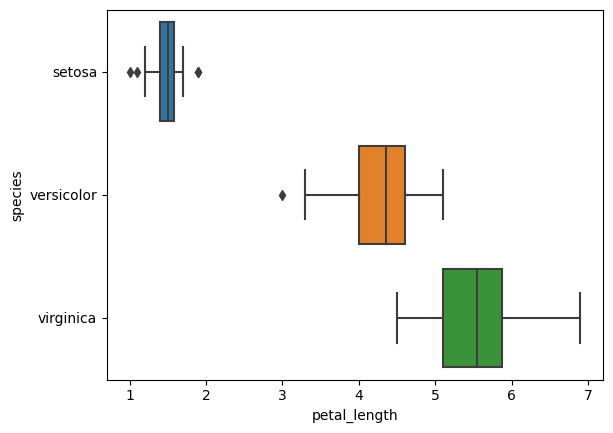

petal_length
1.5    7
1.6    6
5.1    6
1.4    5
4.5    4
1.7    4
4.2    4
5.6    4
1.3    4
3.9    3
5.8    3
4.6    3
4.0    3
1.9    2
5.3    2
5.5    2
1.2    2
4.8    2
6.0    2
4.9    2
4.3    2
6.1    2
5.2    2
4.1    2
4.7    2
5.4    1
5.0    1
6.3    1
3.7    1
4.4    1
3.3    1
3.5    1
5.7    1
6.4    1
6.9    1
Name: petal_length, dtype: int64
1.5    7.777778
1.6    6.666667
5.1    6.666667
1.4    5.555556
4.5    4.444444
1.7    4.444444
4.2    4.444444
5.6    4.444444
1.3    4.444444
3.9    3.333333
5.8    3.333333
4.6    3.333333
4.0    3.333333
1.9    2.222222
5.3    2.222222
5.5    2.222222
1.2    2.222222
4.8    2.222222
6.0    2.222222
4.9    2.222222
4.3    2.222222
6.1    2.222222
5.2    2.222222
4.1    2.222222
4.7    2.222222
5.4    1.111111
5.0    1.111111
6.3    1.111111
3.7    1.111111
4.4    1.111111
3.3    1.111111
3.5    1.111111
5.7    1.111111
6.4    1.111111
6.9    1.111111
Name: petal_length, dtype: float64


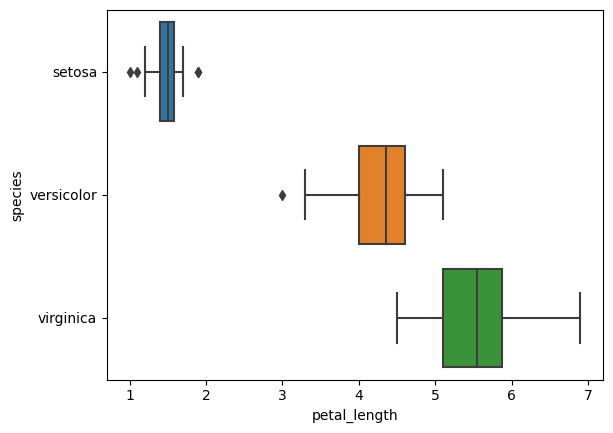

petal_width
0.2    15
1.3    10
1.8     9
1.5     7
0.4     6
2.3     5
1.2     4
0.3     4
1.0     4
1.9     3
1.6     3
1.4     3
2.1     3
0.1     3
2.5     2
2.4     2
2.2     2
2.0     2
0.5     1
0.6     1
1.1     1
Name: petal_width, dtype: int64
0.2    16.666667
1.3    11.111111
1.8    10.000000
1.5     7.777778
0.4     6.666667
2.3     5.555556
1.2     4.444444
0.3     4.444444
1.0     4.444444
1.9     3.333333
1.6     3.333333
1.4     3.333333
2.1     3.333333
0.1     3.333333
2.5     2.222222
2.4     2.222222
2.2     2.222222
2.0     2.222222
0.5     1.111111
0.6     1.111111
1.1     1.111111
Name: petal_width, dtype: float64


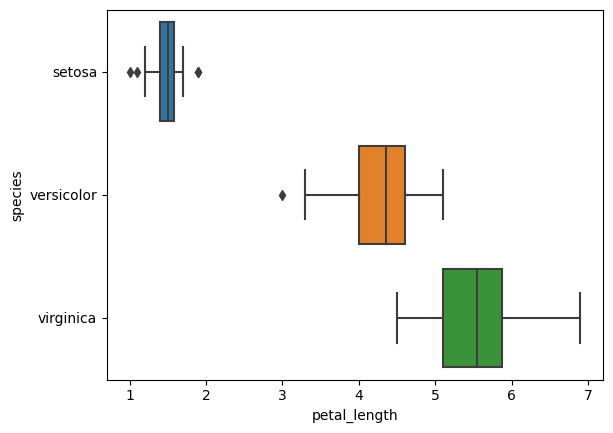

In [14]:
## categorical
## boxplot

for column in num_vars:
    print(column)
    print(itrain[column].value_counts())                           ## value count of each
    print(itrain[column].value_counts(normalize = True) * 100)     ## pc of each column
    sns.boxplot(x = 'petal_length', y = 'species', data = iris_db)
    plt.show()

In [15]:
iris_db.species.describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

sepal_length


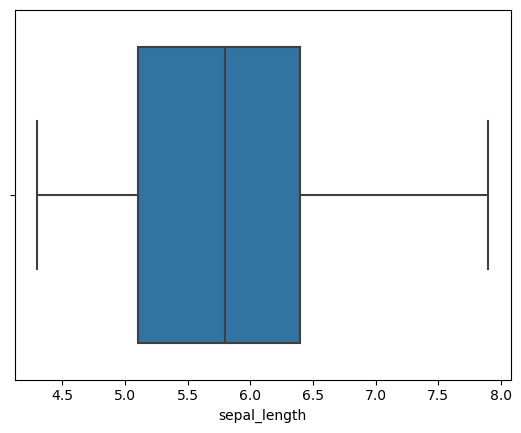

sepal_width


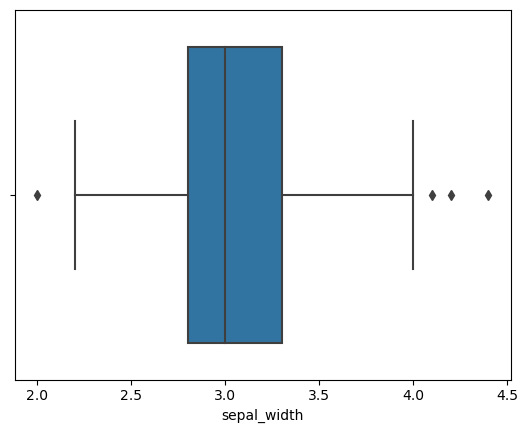

petal_length


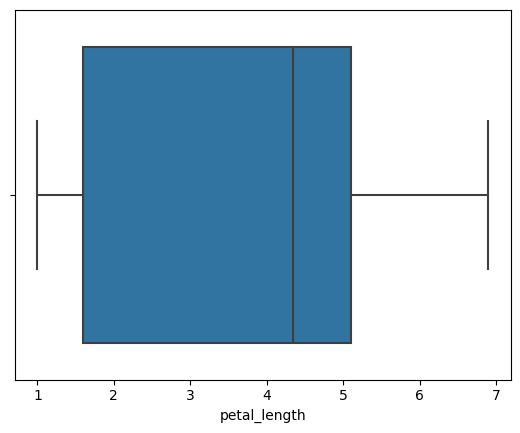

petal_width


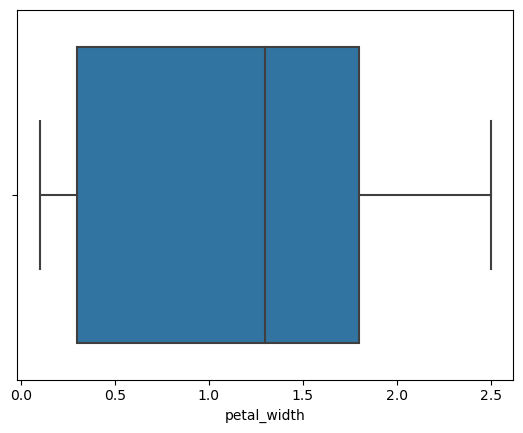

In [16]:
## make a loop with all the NUMERICAL variables

for column in num_vars:
    print(column)
    sns.boxplot(x = column, data = iris_db)
    plt.show()

In [79]:
iris_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        150 non-null    float64
 1   sepal_width         150 non-null    float64
 2   petal_length        150 non-null    float64
 3   petal_width         150 non-null    float64
 4   species             150 non-null    object 
 5   species_setosa      150 non-null    uint8  
 6   species_versicolor  150 non-null    uint8  
 7   species_virginica   150 non-null    uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 6.4+ KB


In [18]:
## For each species (categorical variable): create a frequency table (Crosstab) 
## and a bar plot of those frequencies.

pd.crosstab(iris_db.species, iris_db.sepal_length)

sepal_length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
species,,,,,,,,,,,,,,,,,,,,,
setosa,1,3,1,4,2,5,4,8,8,3,...,0,0,0,0,0,0,0,0,0,0
versicolor,0,0,0,0,0,0,1,2,1,1,...,1,1,1,0,0,0,0,0,0,0
virginica,0,0,0,0,0,0,1,0,0,0,...,2,3,0,1,3,1,1,1,4,1


In [19]:
pd.crosstab(iris_db.species, iris_db.petal_length)

petal_length,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.9,3.0,...,5.7,5.8,5.9,6.0,6.1,6.3,6.4,6.6,6.7,6.9
species,,,,,,,,,,,,,,,,,,,,,
setosa,1,1,2,7,13,13,7,4,2,0,...,0,0,0,0,0,0,0,0,0,0
versicolor,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
virginica,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,1,1,1,2,1


<AxesSubplot:xlabel='species', ylabel='petal_length'>

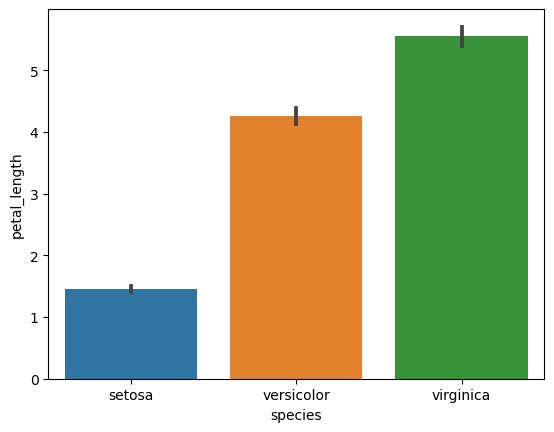

In [20]:
sns.barplot(x = iris_db.species, y = iris_db.petal_length)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

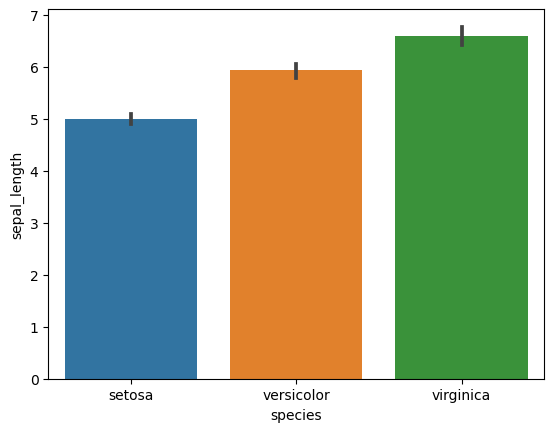

In [21]:
sns.barplot(x = iris_db.species, y = iris_db.sepal_length)

In [22]:
pd.crosstab(iris_db.species, iris_db.sepal_width)

sepal_width,2.0,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,...,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.4
species,,,,,,,,,,,,,,,,,,,,,
setosa,0,0,1,0,0,0,0,0,1,6,...,9,6,3,3,4,2,1,1,1,1
versicolor,1,2,3,3,4,3,5,6,7,8,...,1,0,0,0,0,0,0,0,0,0
virginica,0,1,0,0,4,2,4,8,2,12,...,2,0,1,0,2,0,0,0,0,0


<AxesSubplot:xlabel='species', ylabel='sepal_width'>

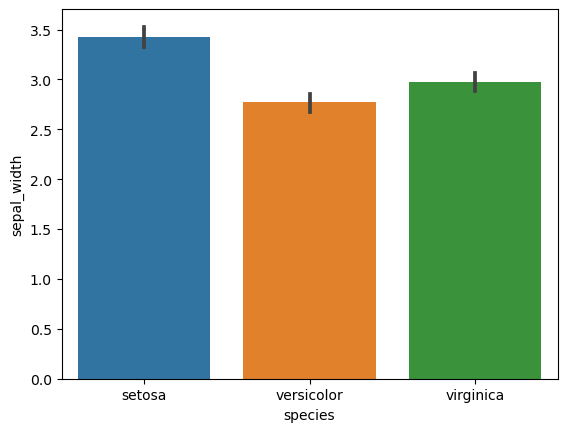

In [23]:
sns.barplot(x = iris_db.species, y = iris_db.sepal_width)

In [24]:
pd.crosstab(iris_db.species, iris_db.petal_width)

petal_width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,...,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
species,,,,,,,,,,,,,,,,,,,,,
setosa,5,29,7,7,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
versicolor,0,0,0,0,0,0,7,3,5,13,...,3,1,1,0,0,0,0,0,0,0
virginica,0,0,0,0,0,0,0,0,0,0,...,1,1,11,5,6,6,3,8,3,3


<AxesSubplot:xlabel='species', ylabel='petal_width'>

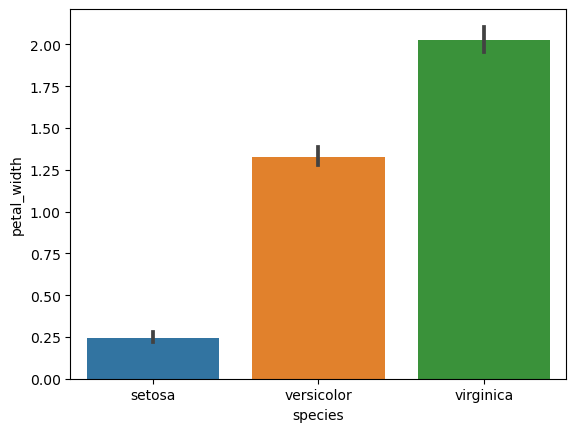

In [25]:
sns.barplot(x = iris_db.species, y = iris_db.petal_width)

In [26]:
pd.crosstab(iris_db.species_versicolor, iris_db.sepal_width)

sepal_width,2.0,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,...,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.4
species_versicolor,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,0,4,2,4,8,3,18,...,11,6,4,3,6,2,1,1,1,1
1,1,2,3,3,4,3,5,6,7,8,...,1,0,0,0,0,0,0,0,0,0


**Takeaway :**
        
        The petal length of Iris setosa is the most limited in range, and the petal length is also the smallest of all three iris species. Iris virginica has the largest petal length ; it also has the widest range of petal lengths.

**Actions :**

    Prefer Iris virginica for large, showy displays, and Iris setosa for more intimate settings.


**Section I.3 / Bivariate Stats**

    - Visualize each measurement type (y-axis, Continuous) with the species variable (x-axis, Discrete) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

    - For each measurement type, compute the descriptive statistics for each species.

    - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

    - Document takeaways & any actions.



<AxesSubplot:xlabel='species', ylabel='sepal_length'>

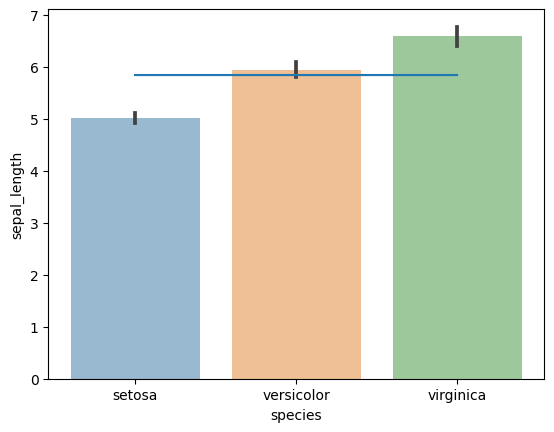

In [106]:
## SEPAL  LENGTH
## ADDING  A  NEW  VARIABLE


sns.barplot(data = iris_db,  x = 'species', y = 'sepal_length', alpha = 0.5)
sns.lineplot(data = iris_db,  x = 'species', y = iris_db.sepal_length.mean(), estimator = 'mean')



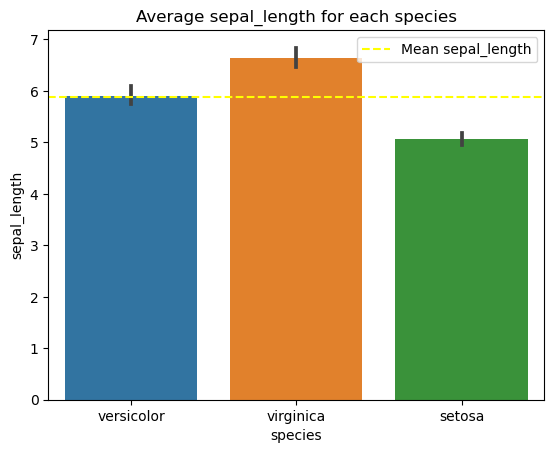

In [107]:
## IN - CLASS  ALTERNATE
## ADDING  A  NEW  VARIABLE

## SEPAL LENGTH

# visualise each sepal measurement of length type for the 'species' variable

col = 'sepal_length'
sns.barplot(x = 'species', y = col, data = itrain)
mean_sepal_length = itrain.sepal_length.mean()
plt.axhline(mean_sepal_length, label = f'Mean {col}', color = 'yellow', linestyle = 'dashed')
plt.title(f'Average {col} for each species')
plt.legend()

In [108]:


## compute descriptive statistics of each colummn for each species : GROUP BY
itrain.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  30.000000   30.000000  30.000000
             mean    5.070000    5.910000   6.646667
             std     0.356371    0.476590   0.533520
             min     4.400000    4.900000   5.800000
             25%     4.825000    5.600000   6.300000
             50%     5.000000    5.800000   6.500000
             75%     5.375000    6.175000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  30.000000   30.000000  30.000000
             mean    3.446667    2.806667   2.956667
             std     0.420782    0.281539   0.309263
             min     2.300000    2.300000   2.200000
             25%     3.200000    2.625000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.775000    3.000000   3.100000
             max     4.400000    3.400000   3.800000
petal_length count  30.000000   30.000000  30.000000
             mean    1.510000    4.273333   5.563333
             std     0.178789    0.409317   0.492344
             min     1.200000    3.300000   4.800000
             25%     1.400000    4.000000   5.125000
             50%     1.500000    4.250000   5.550000
             75%     1.600000    4.575000   5.800000
             max     1.900000    5.100000   6.900000
petal_width  count  30.000000   30.000000  30.000000
             mean    0.266667    1.320000   2.023333
             std     0.121296    0.193694   0.286095
             min     0.100000    1.000000   1.500000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.375000    1.475000   2.300000
             max     0.600000    1.800000   2.500000

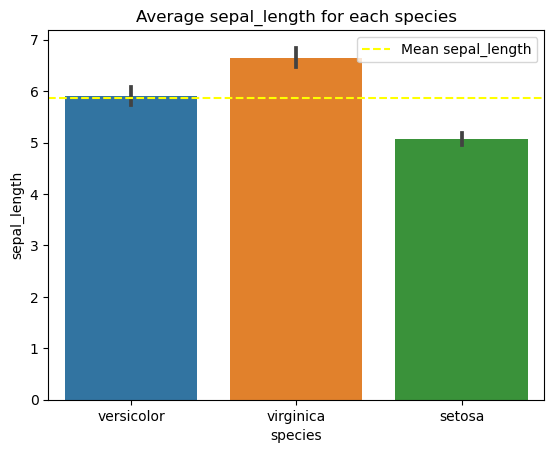

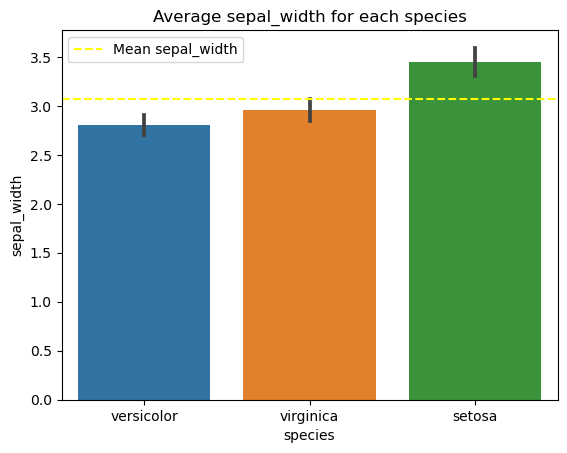

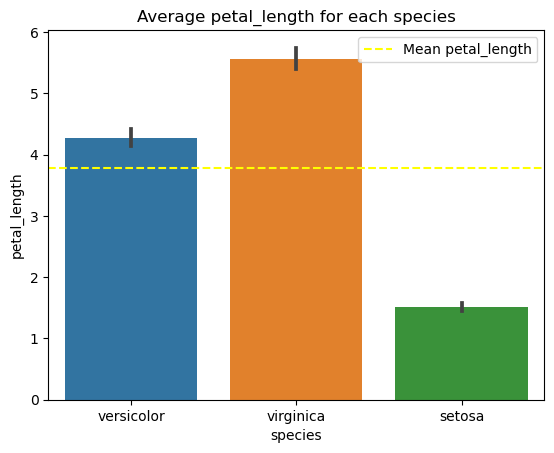

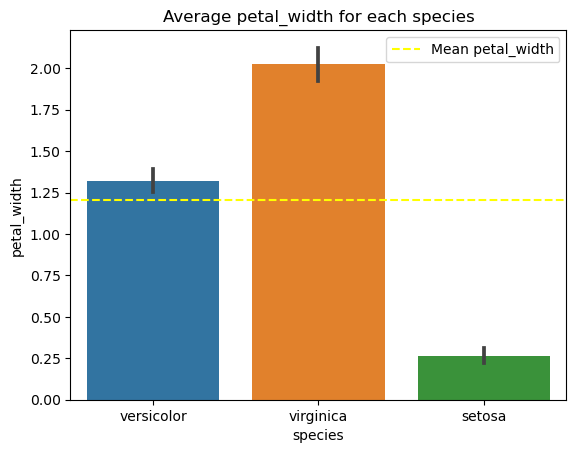

In [109]:
## NOW DO THIS FOR EACH VAIRABLE : BARPLOT WITH SPECIES ON X & VARIABLE ON Y


for col in num_cols:

    sns.barplot(x = 'species', y = col, data = itrain)

    overall_mean = itrain[col].mean()

    plt.axhline(overall_mean, 
                label = f'Mean {col}', 
                color = 'yellow', 
                linestyle = 'dashed')

    plt.title(f'Average {col} for each species')
    plt.legend()
    plt.show()
    


<b> Takeaways </b>:<br>
<br/> - SEPAL LENGTH : virginica longest, setosa shortest
<br/> - SEPAL WIDTH : versicolor shortest, setosa longest
<br/> - PETAL LENGTH : virginica significantly longer, setosa significantly shorter
<br/> - PETAL WIDTH : virginica significantly longer, setosa significantly shorter
<br><br> It appears that distinguishing between virginica and setosa would be evident, whereas identifying vericolor from amongst the two would be more difficult, due to its middling size.

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

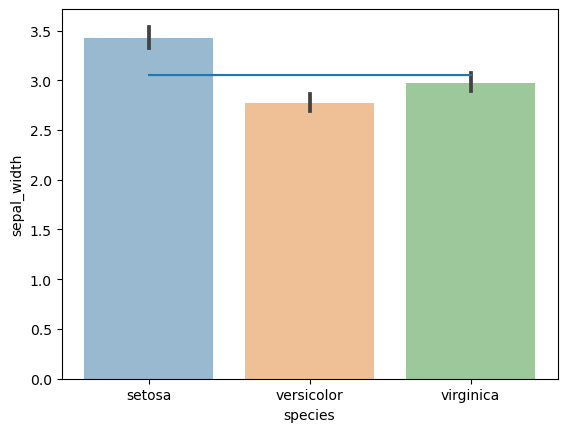

In [28]:
## THIS IS MINE

## SEPAL WIDTH


sns.barplot(data = iris_db,  x = 'species', y = 'sepal_width', alpha = 0.5)
sns.lineplot(data = iris_db,  x = 'species', y = iris_db.sepal_width.mean(), estimator = 'mean')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

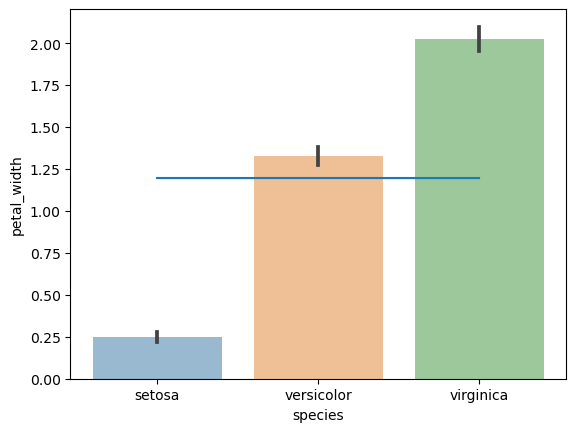

In [29]:
## PETAL WIDTH


sns.barplot(data = iris_db,  x = 'species', y = 'petal_width', alpha = 0.5)
sns.lineplot(data = iris_db,  x = 'species', y = iris_db.petal_width.mean(), estimator = 'mean')

<AxesSubplot:xlabel='species', ylabel='petal_length'>

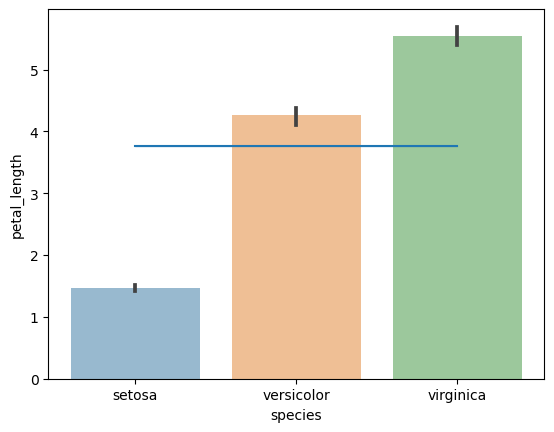

In [30]:
## PETAL LENGTH

sns.barplot(data = iris_db,  x = 'species', y = 'petal_length', alpha = 0.5)
sns.lineplot(data = iris_db,  x = 'species', y = iris_db.petal_length.mean(), estimator = 'mean')

**For each measurement type, compute the descriptive statistics for each species.**

In [31]:
## (iris_db.sepal_length == 'setosa').info()

# doen't work : iris_db['species' == 'setosa'['sepal_length']]


In [114]:
setosa_stats = iris_db[iris_db['species'] == 'setosa'][['petal_length', 
                                                        'petal_width', 
                                                        'sepal_length',
                                                        'sepal_width']].describe()

setosa_stats

,petal_length,petal_width,sepal_length,sepal_width
count,50.000000,50.000000,50.00000,50.000000
mean,1.462000,0.246000,5.00600,3.428000
std,0.173664,0.105386,0.35249,0.379064
min,1.000000,0.100000,4.30000,2.300000
25%,1.400000,0.200000,4.80000,3.200000
50%,1.500000,0.200000,5.00000,3.400000
75%,1.575000,0.300000,5.20000,3.675000
max,1.900000,0.600000,5.80000,4.400000


In [115]:
virg_stats = iris_db[iris_db['species'] == 'virginica'][
                    ['petal_length', 'petal_width', 
                      'sepal_length', 'sepal_width']
                    ].describe()
virg_stats

,petal_length,petal_width,sepal_length,sepal_width
count,50.000000,50.00000,50.00000,50.000000
mean,5.552000,2.02600,6.58800,2.974000
std,0.551895,0.27465,0.63588,0.322497
min,4.500000,1.40000,4.90000,2.200000
25%,5.100000,1.80000,6.22500,2.800000
50%,5.550000,2.00000,6.50000,3.000000
75%,5.875000,2.30000,6.90000,3.175000
max,6.900000,2.50000,7.90000,3.800000


In [116]:
versicolor_stats = iris_db[iris_db['species'] == 'versicolor'][
                            ['petal_length', 'petal_width', 
                             'sepal_length', 'sepal_width']].describe()
versicolor_stats

,petal_length,petal_width,sepal_length,sepal_width
count,50.000000,50.000000,50.000000,50.000000
mean,4.260000,1.326000,5.936000,2.770000
std,0.469911,0.197753,0.516171,0.313798
min,3.000000,1.000000,4.900000,2.000000
25%,4.000000,1.200000,5.600000,2.525000
50%,4.350000,1.300000,5.900000,2.800000
75%,4.600000,1.500000,6.300000,3.000000
max,5.100000,1.800000,7.000000,3.400000


In [35]:
iris_db[iris_db['species'] == 'setosa']['petal_width'].describe()

count    50.000000
mean      0.246000
std       0.105386
min       0.100000
25%       0.200000
50%       0.200000
75%       0.300000
max       0.600000
Name: petal_width, dtype: float64

**For virginica & versicolor:**
    
    - Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups.  
    - Do the same for the other measurement types.

In [117]:
scipy.stats.mannwhitneyu(virg_stats['petal_width'], 
                         versicolor_stats['petal_width'], 
                         method = 'auto')

MannwhitneyuResult(statistic=48.0, pvalue=0.10305400433515148)

In [37]:
virg_stats['petal_width']['mean'], versicolor_stats['petal_width']['mean']

(2.026, 1.3259999999999998)

In [38]:
scipy.stats.mannwhitneyu(virg_stats['sepal_width'], 
                         versicolor_stats['sepal_width'], 
                         method = 'auto')

MannwhitneyuResult(statistic=38.5, pvalue=0.5277001594112509)

In [39]:
virg_stats['sepal_width']['mean'], versicolor_stats['sepal_width']['mean']

(2.9739999999999998, 2.7700000000000005)

In [40]:
scipy.stats.mannwhitneyu(virg_stats['petal_length'], 
                         versicolor_stats['petal_length'])

MannwhitneyuResult(statistic=48.0, pvalue=0.10305400433515148)

In [41]:
virg_stats['petal_length']['mean'],versicolor_stats['petal_length']['mean']

(5.552, 4.26)

In [42]:
scipy.stats.mannwhitneyu(virg_stats['sepal_length'], 
                         versicolor_stats['sepal_length'])

MannwhitneyuResult(statistic=40.0, pvalue=0.4302181369641729)

In [43]:
virg_stats['sepal_length']['mean'], versicolor_stats['sepal_length']['mean']

(6.587999999999998, 5.936)

In [130]:
alpha = 0.05

In [132]:
t, p = scipy.stats.mannwhitneyu(itrain[itrain.species == 'virginica'].petal_width, 
                         itrain[itrain.species == 'versicolor'].petal_width
                        )

t, p


(883.0, 1.274471779403707e-10)

In [134]:

if p < alpha:
    print('Reject the null hypothesis ; there is a significant difference in petal width.')
else: 
    print('There is not enough evidence to reject the null hypothesis')

Reject the null hypothesis ; there is a significant difference in petal width.


**Takeaway :**
        
        There is a significant difference in mean petal width measurements of spp Iris virginica and Iris versicolor.

**Actions :**
    
        Learn more about when to use the Mann-Whitney test. (It can be used when a T-test can be used, but a T-test cannot always be used when a Mann-Whitney test should be used.)
 

**Section I.4 / Multivariate Stats**

    - Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

    - Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

    - Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

    - Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

    - Document takeaways and any actions.



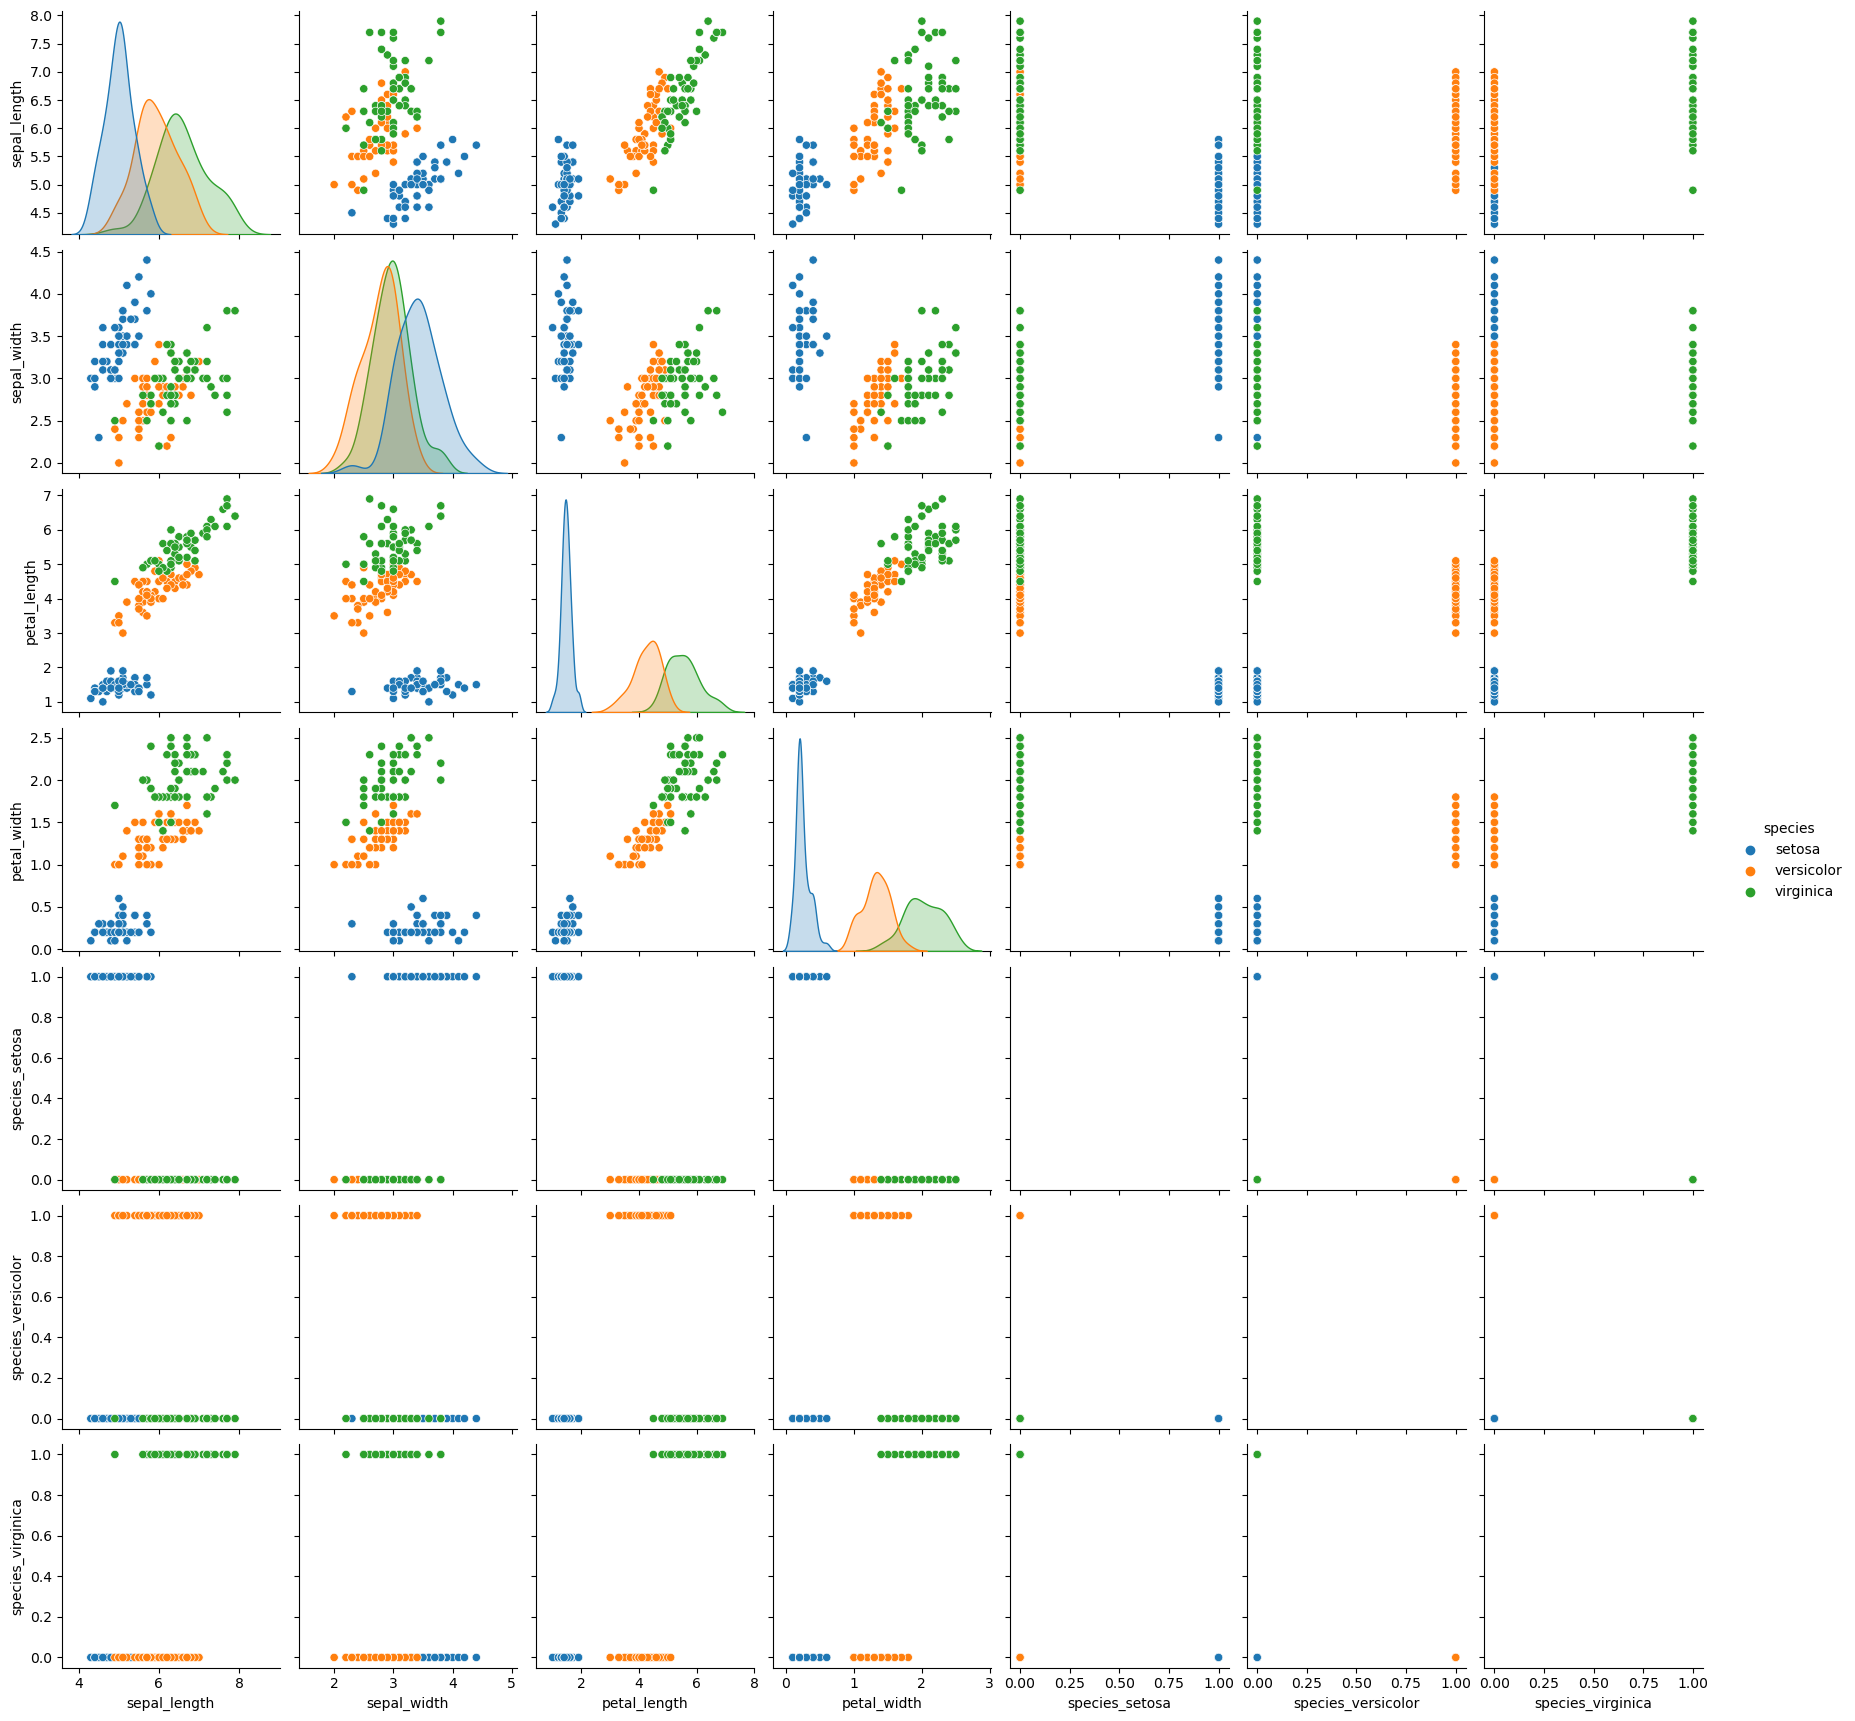

In [44]:
## Visualize the interaction of each measurement type with the others using 
## a pairplot (or scatter matrix or something similar) and add color to represent species.

# sns.pairplot(virg_stats['petal_width']['mean'], versicolor_stats['petal_width']['mean'])

sns.pairplot(iris_db, hue = 'species')

In [45]:
new_df = virg_stats + versicolor_stats + setosa_stats
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  8 non-null      float64
 1   petal_width   8 non-null      float64
 2   sepal_length  8 non-null      float64
 3   sepal_width   8 non-null      float64
dtypes: float64(4)
memory usage: 620.0+ bytes


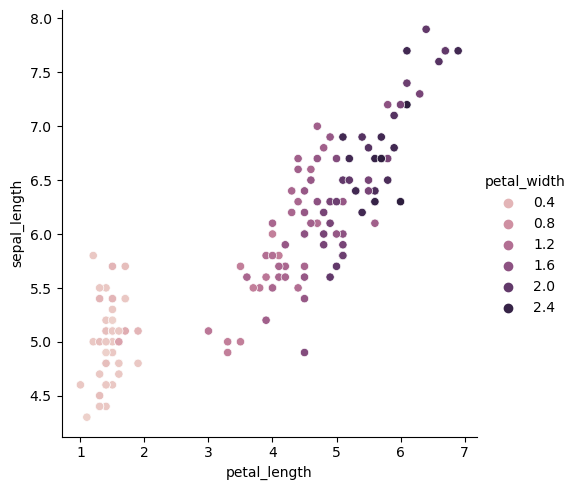

In [46]:
sns.relplot(data = iris_db, x = 'petal_length', y = 'sepal_length', hue = 'petal_width')

**Create a swarmplot using a melted dataframe of all your numeric variables.**  
The x-axis should be the variable name, the y-axis the measure.   
Add another dimension using color to represent species. Document takeaways from this visualization.  


NO : pd.melt(data = iris_db, 'species', var_name = 'sepal_length')  

NO : iris = iris_db.melt(id_vars='species', var_name='sepal_length', value_name='Value')


In [47]:
# sns.swarmplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')

# sns.swarmplot(data = iris)

In [48]:
iris2 = iris_db
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [49]:
del(iris2['species_id'])

KeyError: 'species_id'

In [ ]:
iris2 = pd.melt(iris_db, "species", value_vars = ['sepal_length', 'sepal_width','petal_length', 'petal_width'])
iris2.tail()

In [ ]:
sns.swarmplot(data = iris2, x = 'variable', y = 'value', hue = 'species')
plt.xticks(rotation=45)

In [ ]:
sns.swarmplot(data = iris2, x = 'species', y = 'value', hue = 'variable')
plt.xticks(rotation=45)